In [1]:
!pip install kaggle

引入kaggle資料(ex: !kaggle competitions download -c machine-learningntut-2021-autumn-regression)

In [2]:
api_token = {"username":"kaggle_username","key":"kaggle_key"}
import json
import zipfile
import os
 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
!kaggle competitions download -c machine-learningntut-2021-autumn-regression
 
!ls /kaggle

  0% 0.00/81.3k [00:00<?, ?B/s]
100% 81.3k/81.3k [00:00<00:00, 31.0MB/s]
  0% 0.00/475k [00:00<?, ?B/s]
100% 475k/475k [00:00<00:00, 15.5MB/s]
  0% 0.00/945 [00:00<?, ?B/s]
100% 945/945 [00:00<00:00, 770kB/s]
  0% 0.00/237k [00:00<?, ?B/s]
100% 237k/237k [00:00<00:00, 76.2MB/s]
  0% 0.00/568k [00:00<?, ?B/s]
100% 568k/568k [00:00<00:00, 105MB/s]
metadata.csv  sampleSubmission.csv  test-v3.csv  train-v3.csv.zip  valid-v3.csv


解壓縮train-v3.csv.zip

In [3]:
!unzip "/kaggle/train-v3.csv.zip" -d "/kaggle/"

Archive:  /kaggle/train-v3.csv.zip
  inflating: /kaggle/train-v3.csv    


In [4]:
#輸入資料並查看
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

basepath = "/kaggle/"

train = pd.read_csv(basepath + "train-v3.csv")
valid = pd.read_csv(basepath + "valid-v3.csv")

train_price = train[['price']].values.reshape(-1, 1)
valid_price = valid[['price']].values.reshape(-1, 1)

x1 = train_price #訓練房價
x2 = valid_price #驗證房價
#print(x2)
train.head()

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.0,1900,8160,1,0,0,3,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.0,3380,16133,1,0,1,3,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.0,2070,9000,1,0,0,4,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.0,1150,8924,1,0,0,3,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.5,2040,7503,2,0,0,3,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503


In [5]:
# ABS
train['long'] = abs(train['long'])
valid['long'] = abs(valid['long'])

In [6]:
t_h = train.isnull().sum()
warn = 0
for i in (0,22):
  if (t_h[i] != 0):
      warn = warn + 1
if(warn == 0):
  print('Check finished, the data does not missing.')    
# 檢查資料有無缺失

Check finished, the data does not missing.


In [7]:
if( x1.size == train['sale_month'].size ):
  print('Same.')
else:
  print('Check again.')
#比對資料大小是否一樣

Same.


In [8]:
# 資料分析
import seaborn as sns
# 用seaborn一次把圖表的美化格式設定好，這裡是只有先設定圖表長寬
sns.set(rc={'figure.figsize':(22,22)})

In [9]:
#sns.distplot(train['price']) 

In [10]:
# print("Skewness: %f" % train['price'].skew())
# print("Kurtosis: %f" % train['price'].kurt())

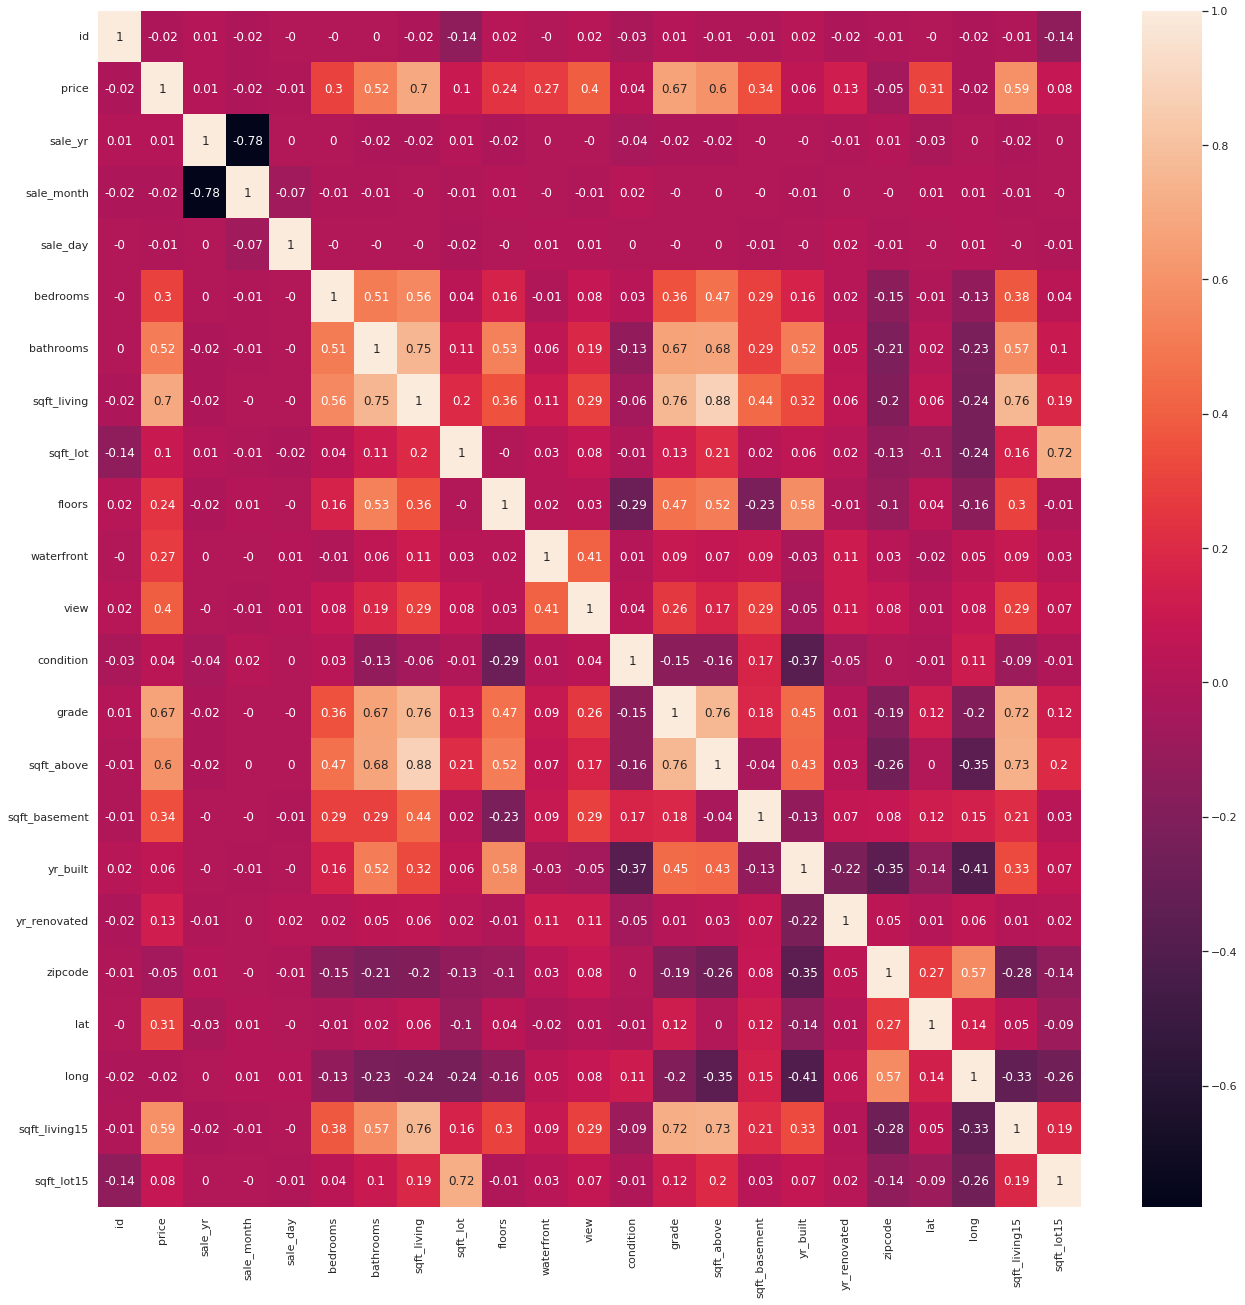

In [11]:
correlation_matrix = train.corr().round(2)
sns.set(rc={'figure.figsize':(22,22)})
# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data = correlation_matrix, annot = True)

In [12]:
# sale_yr, sale_day, sale_month 直接拿掉(毫無作用)
train = train.drop(['sale_day', 'sale_yr', 'sale_month'], axis = 1) # 20
valid = valid.drop(['sale_day', 'sale_yr', 'sale_month'], axis = 1) # 20

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


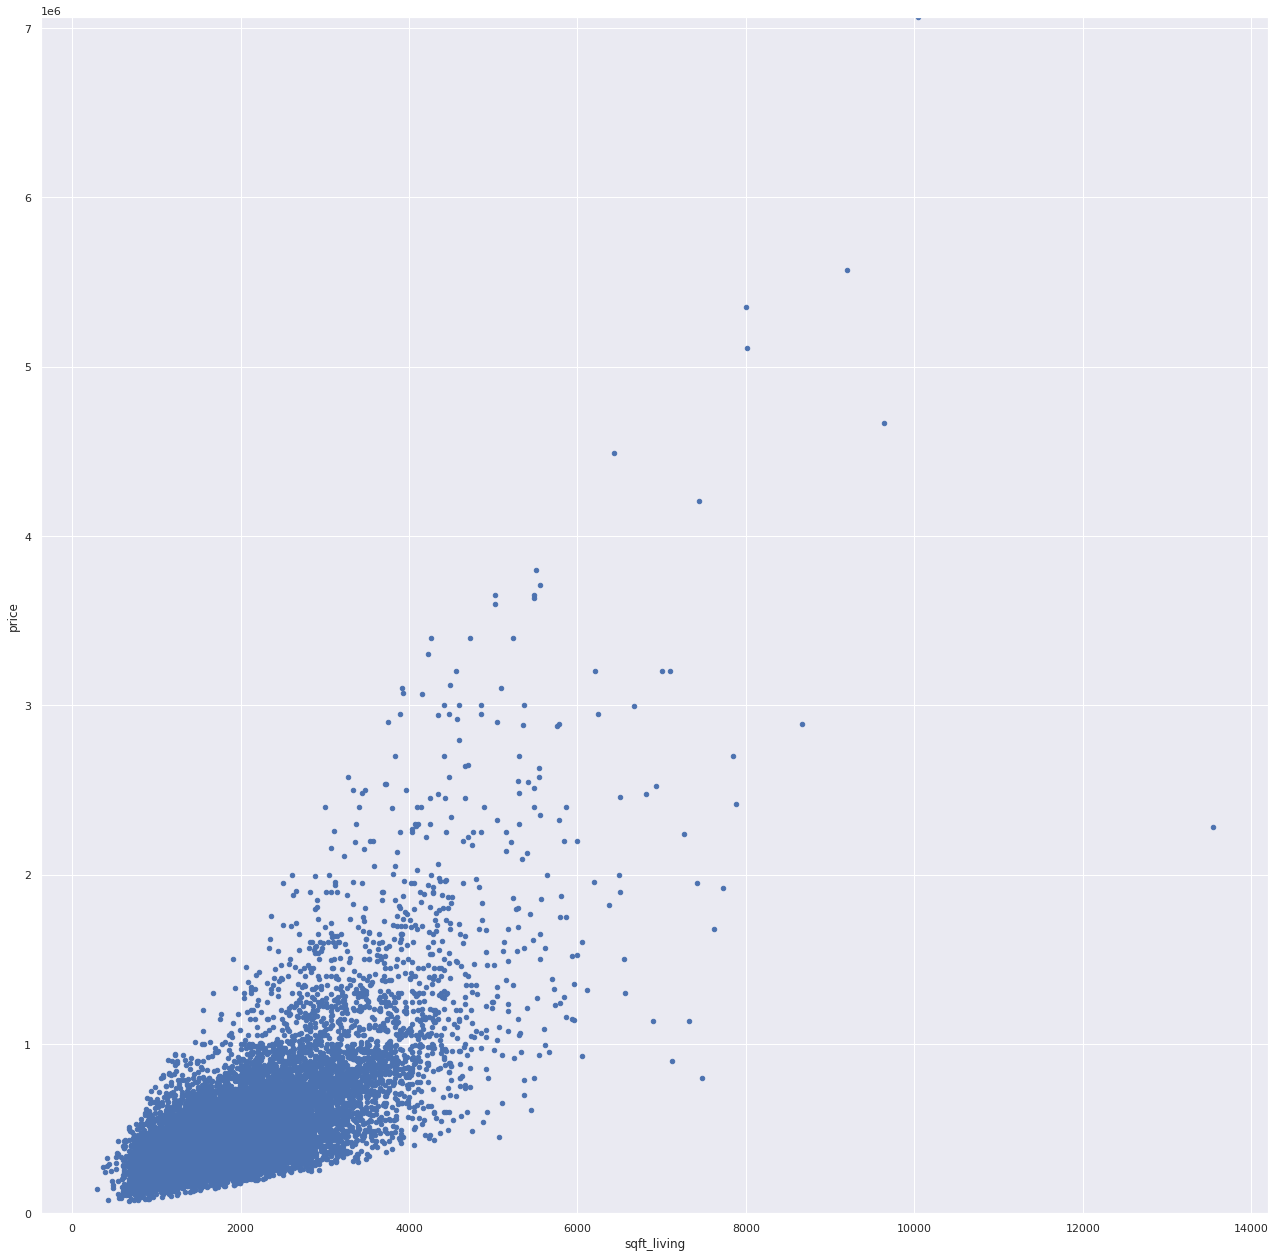

In [13]:
var = 'sqft_living'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,train['price'].max()));
# 可以看出 price 和 sqft_living 關係很密切，並且基本呈線性關係。

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


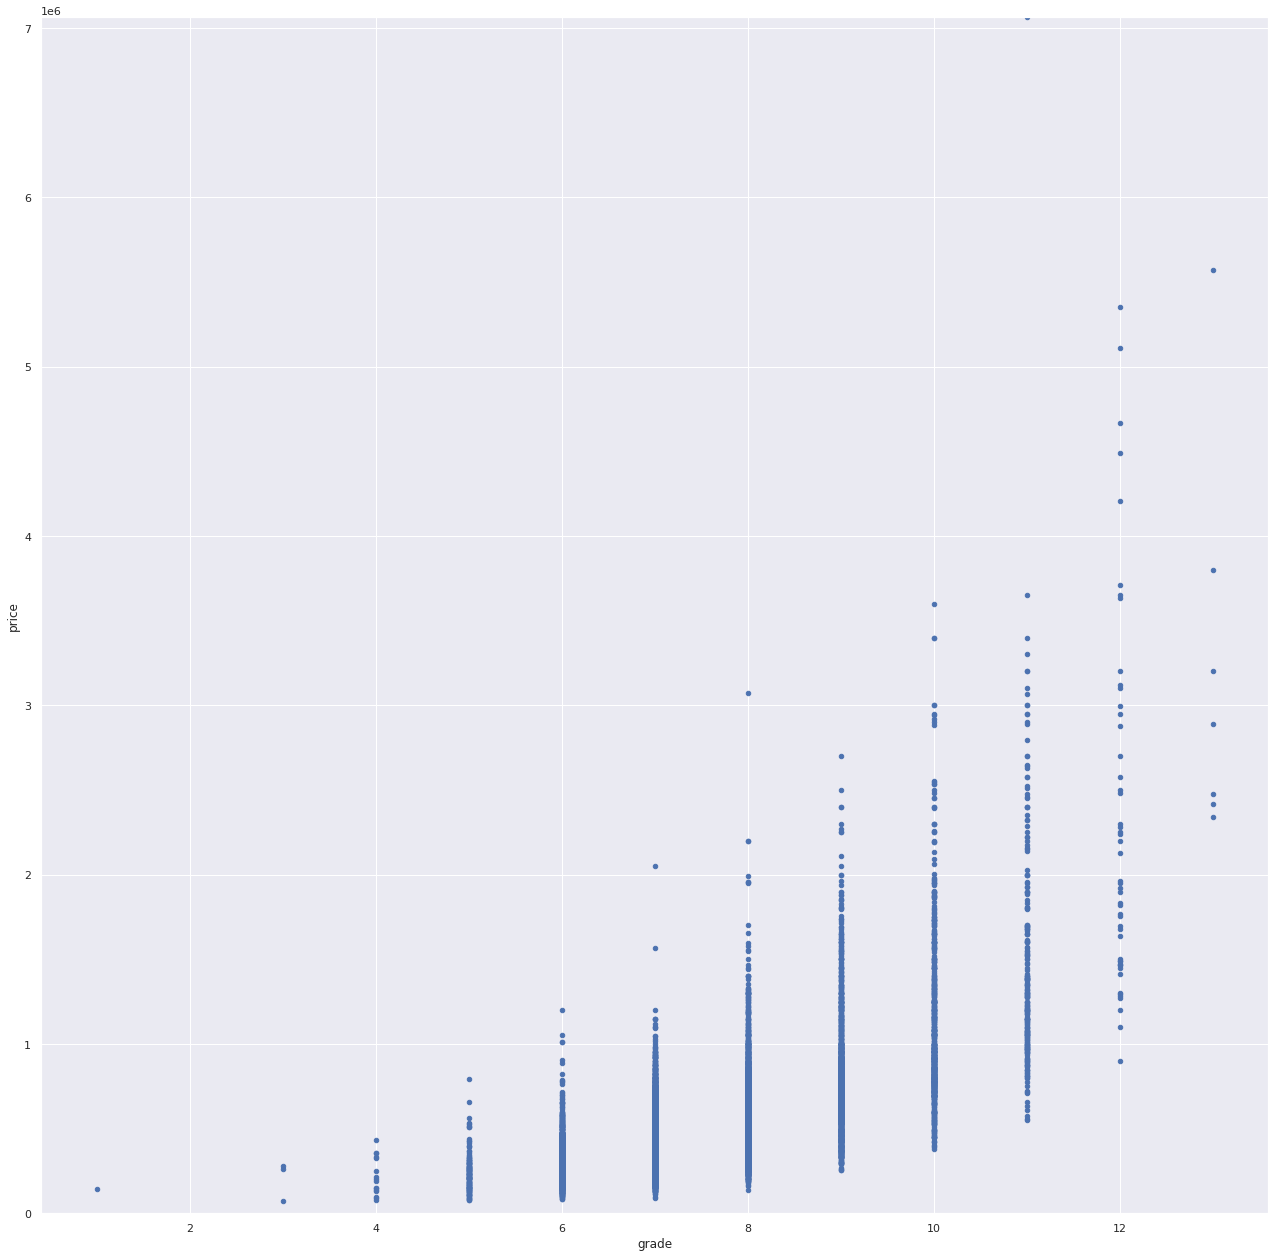

In [14]:
var = 'grade'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,train['price'].max()));
# price 和 grade 關係也很密切，從圖中可以看出離散的線性分布

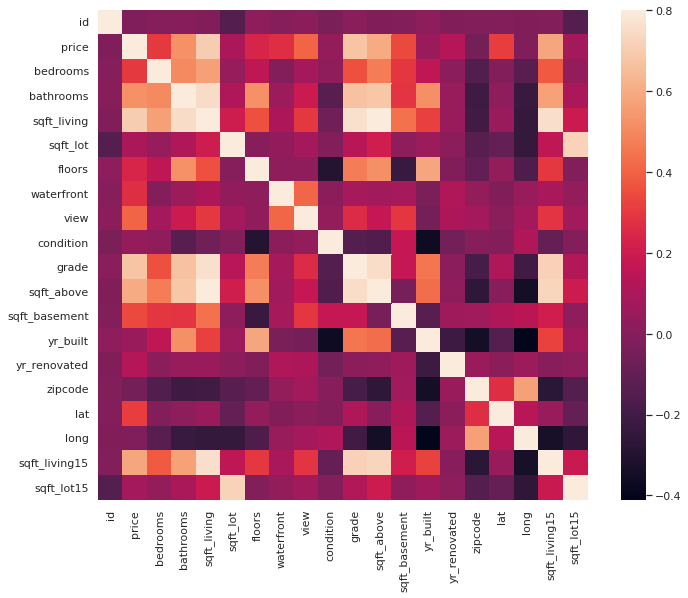

In [15]:
from matplotlib import pyplot as plt
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# 首先，這裡看到跟price有高度相關的是 sqft_living, grade
# 再來，bathroom, sqft_living, bedrooms
# grade, sqft_above, 相關性的程度達到了一種多重共線性的情況。我們可以總結出這些變量幾乎包含相同的信息，所以確實出現了多重共線性。

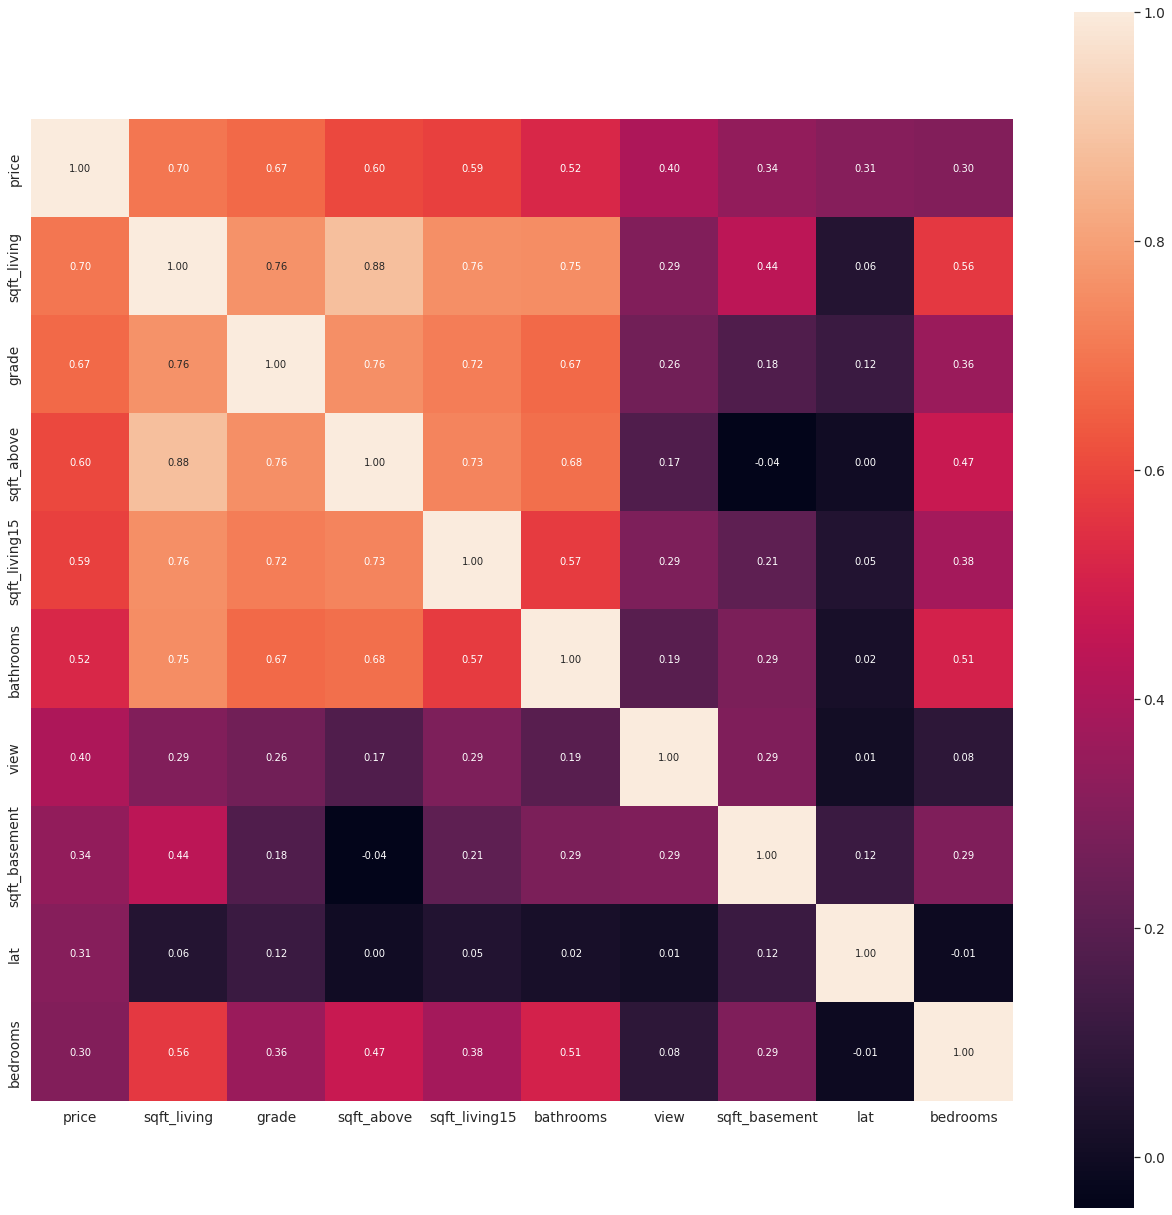

In [16]:
# price 相關係數矩陣
k = 10 #number ofvariables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# 從圖中可以看出右上角那塊比較有的相關性
# grade 和 sqft_living, sqft_living15 和 sqft_living, sqft_living15 和 sqft_above 關聯性都很強
# 其中可以看到 grade 跟 sqft_living 影響最多，所以這裡可以去掉 sqft_living15

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


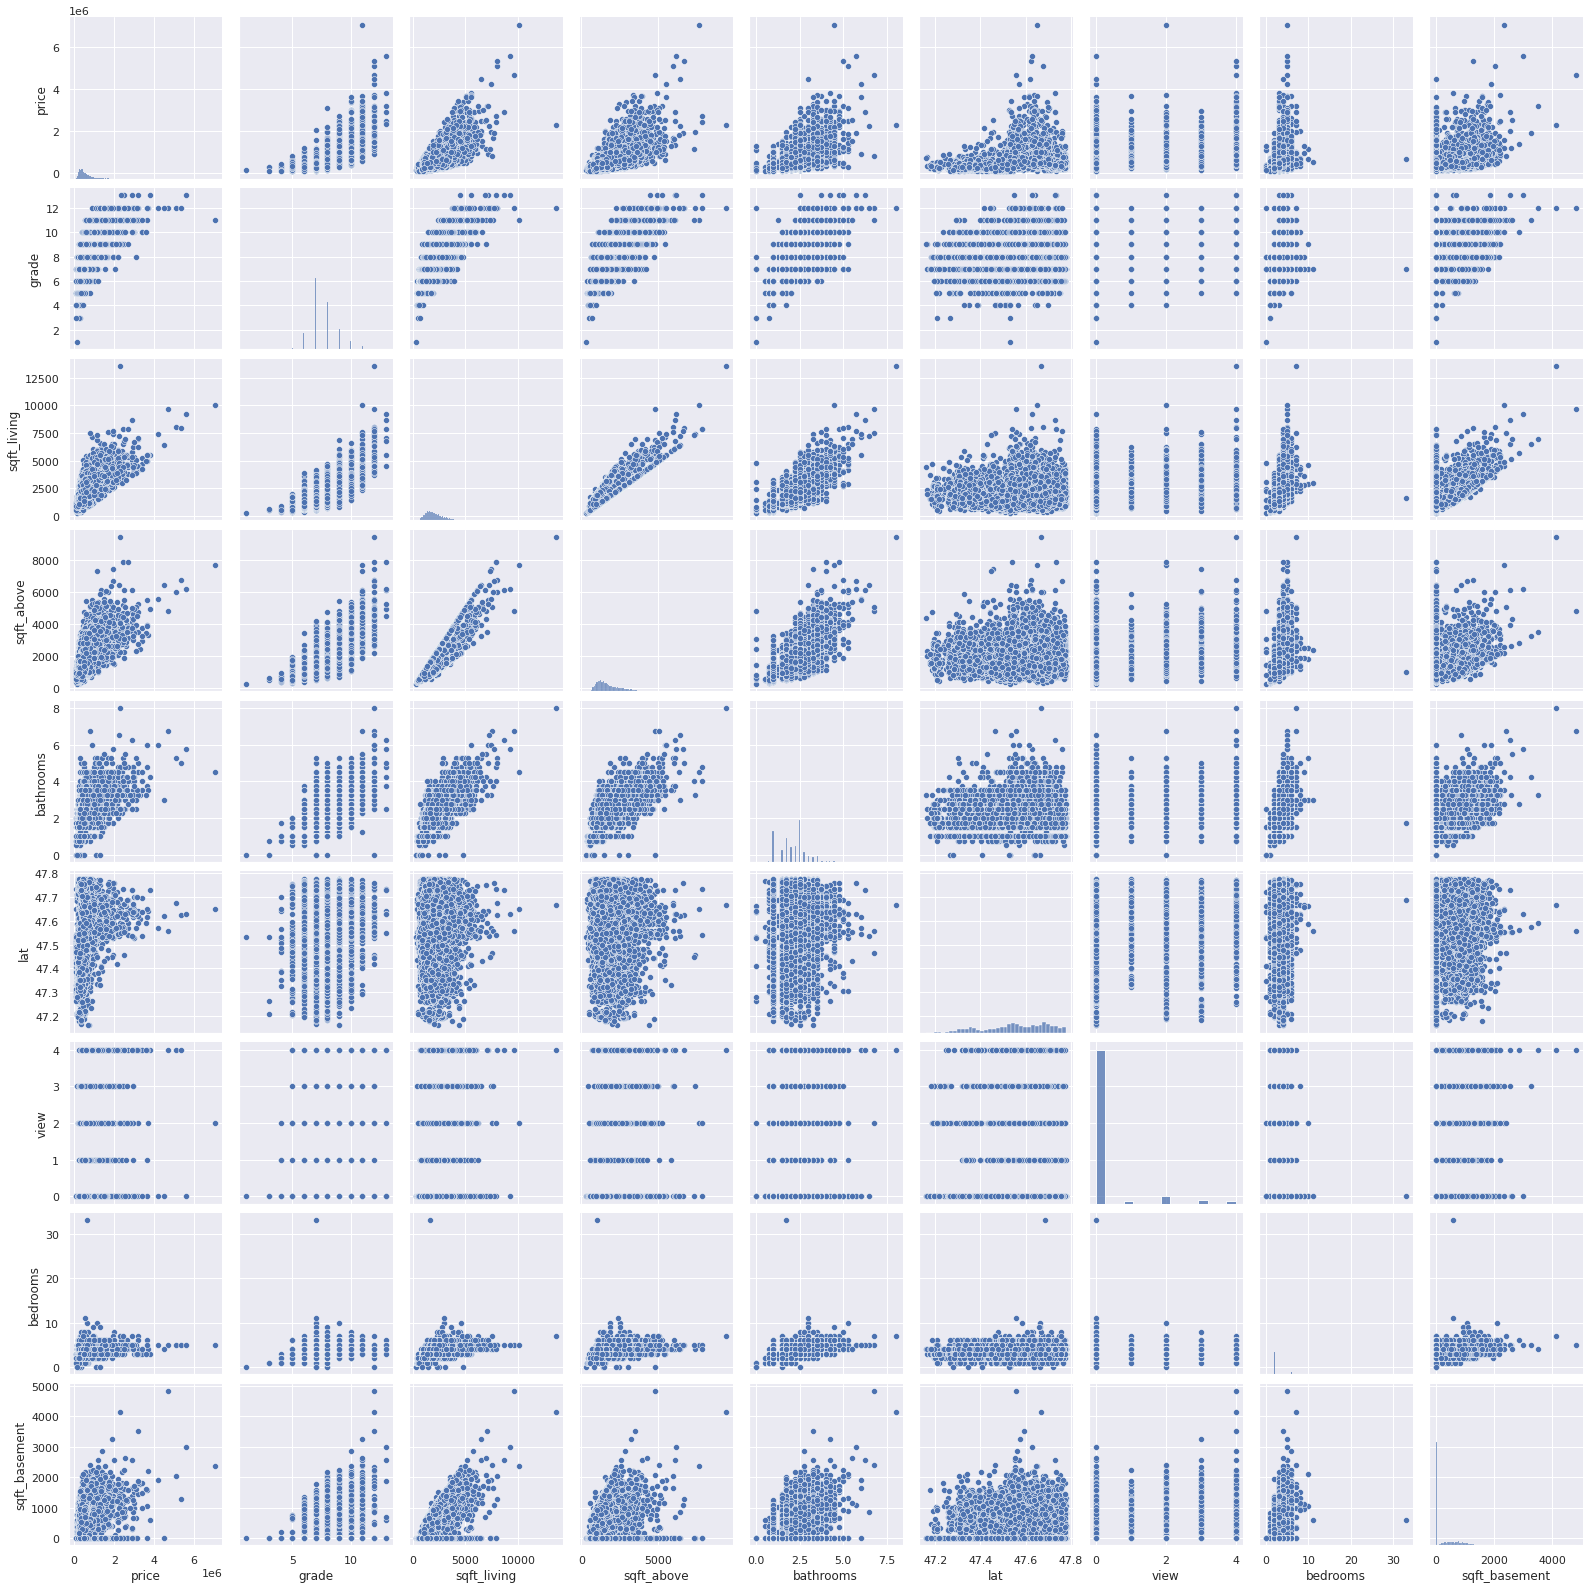

In [17]:
sns.set()
cols = ['price', 'grade', 'sqft_living','sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement']
sns.pairplot(train[cols], size = 2.5)
plt.show();
# 雖然我們已經知道了一些主要特徵，而這一豐富的散點圖給了我們一個關於變量關係的合理想法
# 其中，sqft_living 和 sqft_above 之間的散點圖是很有意思的。我們可以看出這幅圖中，一些點組成了線，看起來很像邊界
# price 和 其他之間的散點圖也值得我們思考

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


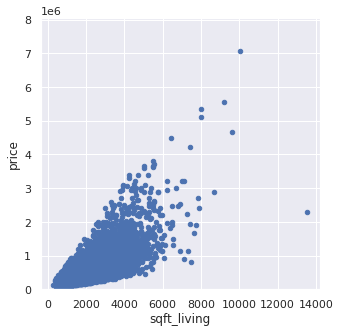

In [18]:
# 雙變量分析
sns.set(rc={'figure.figsize':(5,5)})
var = 'sqft_living'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,train['price'].max()+1000000));
# 其中有一個離群值很明顯，可以將其刪除

In [19]:
# 刪除點
train.sort_values(by = 'sqft_living',ascending = False)[:1]
train = train.drop(train[train['id'] == 1225069038].index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


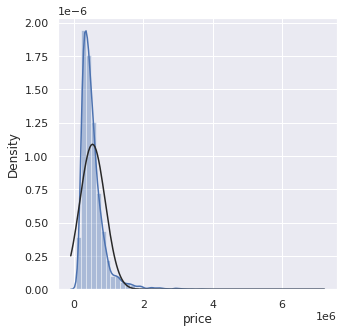

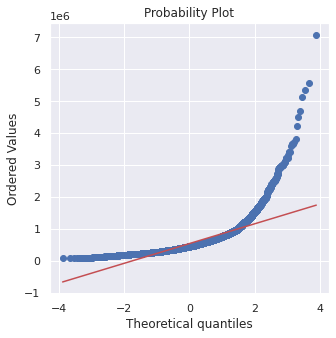

In [20]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train['price'], fit = norm);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
# 可以看出，房價分佈不是正態的，顯示了峰值，正偏度，但是並不跟隨對角線，可以用對數變換來解決這個問題

In [21]:
train['price']= np.log(train['price'])
# 進行對數變換

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


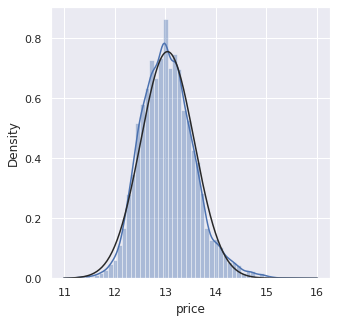

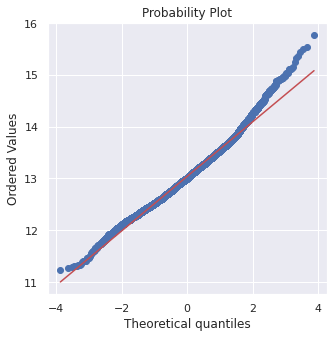

In [22]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train['price'], fit = norm);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
# 可以看出，房價分佈不是正態的，顯示了峰值，正偏度，但是並不跟隨對角線，可以用對數變換來解決這個問題

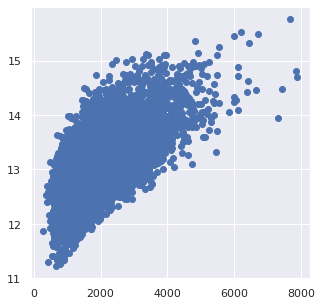

In [23]:
plt.scatter(train['sqft_above'],train['price']);
# 可以看出 price 在整個 sqft_above 變量範圍內顯示出了同等級的變化。

In [24]:
# 調整數據 
# sqft_basement long sqft_living sqft_above bedrooms bathrooms sqft_lot
# sqft_living15 sqft_lot15 condition grade yr_built floors
# waterfront view yr_renovated 不處理
# sale_yr	sale_month	sale_day 刪掉 zipcode lat 降低準確度

In [25]:
# 重新輸入資料
train = pd.read_csv(basepath + "train-v3.csv")
valid = pd.read_csv(basepath + "valid-v3.csv")
test  = pd.read_csv(basepath + "test-v3.csv")
# 關聯性低的拿掉
train = train.drop(['sale_month', 'sale_day', 'sale_yr'], axis = 1)
valid = valid.drop(['sale_month', 'sale_day', 'sale_yr'], axis = 1)
test  = test.drop(['sale_month', 'sale_day', 'sale_yr'], axis = 1)
all = pd.concat([train,test,valid], axis = 0, join = 'outer')

In [26]:
# 全部資料一起分析
var = 'long'
all[var] = (all[var] - all[var].min())/(all[var].max() - all[var].min())
all[var] = np.log1p(all[var])
all[var] = np.log1p(all[var])

偏度(Skewness):
id                0.61
price             3.79
bedrooms          1.97
bathrooms         0.51
sqft_living       1.47
sqft_lot         13.06
floors            0.73
waterfront       11.39
view              3.40
condition         1.03
grade             0.77
sqft_above        1.45
sqft_basement     1.58
yr_built         -0.47
yr_renovated      4.55
zipcode           0.41
lat              -0.49
long              0.46
sqft_living15     1.11
sqft_lot15        9.51
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


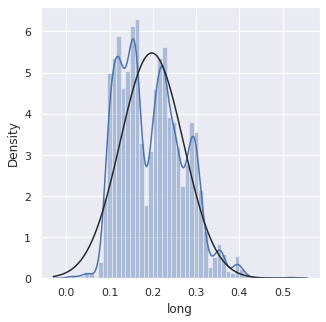

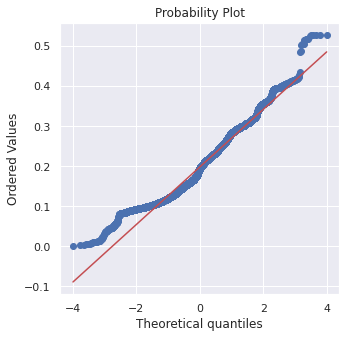

In [27]:
# 藉由觀察調整算式
skewness = round(all.skew(), 2);print(f"偏度(Skewness):\n{skewness}")
sns.set(rc={'figure.figsize':(5,5)});sns.distplot(all[var], fit=norm); fig = plt.figure();res = stats.probplot(all[var], plot=plt)

In [28]:
# 觀察數據
# sns.set(rc={'figure.figsize':(5,5)});sns.distplot(train[var], fit=norm); fig = plt.figure();res = stats.probplot(train[var], plot=plt)

In [29]:
# 刪除離群值
print ("Shape Of The Before Ouliers: ",train[var].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(train[var],75) - np.percentile(train[var],25)
# outlier = Q3 + n*IQR 
train=train[train[var] < np.percentile(train[var],75)+n*IQR]
# outlier = Q1 - n*IQR 
train=train[train[var] > np.percentile(train[var],25)-n*IQR]
print ("Shape Of The After Ouliers: ",train.shape)

Shape Of The Before Ouliers:  (12967,)
Shape Of The After Ouliers:  (12810, 20)


In [30]:
# 處理 data train
var = 'sqft_lot15'
train[var] = train[var] - train[var].min()
train[var] = abs(train[var] - train[var].mean())
train[var] = np.log1p(train[var])
train[var] = abs(train[var] - train[var].max())
train[var] = np.log1p(train[var])
train[var] = abs(train[var] - train[var].max())
train[var] = np.log1p(train[var])
train[var] = abs(train[var] - train[var].max())
train[var] = np.expm1(train[var])
var = 'sqft_living15'
train[var] = np.log1p(train[var])
var = 'yr_built'
train[var] = train[var] - train[var].min()
train[var] = abs(train[var] - train[var].mean())
train[var] = np.log1p(train[var])
train[var] = abs(train[var] - train[var].max())
train[var] = np.log1p(train[var])
var = 'sqft_basement'
train[var] = np.power(train[var], 0.5)
train[var] = np.log1p(train[var])
var = 'sqft_above'
train[var] = np.log1p(train[var])
var = 'grade'
train[var] = np.log1p(train[var])
valid[var] = np.log1p(valid[var])
var = 'condition'
train[var] = np.log1p(train[var])
train[var] = np.log1p(train[var])
train[var] = np.log1p(train[var])
var = 'floors'
train[var] = np.log1p(train[var])
train[var] = np.log1p(train[var])
var = 'sqft_lot'
train[var] = np.log1p(train[var])
train[var] = np.log1p(train[var])
var = 'sqft_living'
train[var] = np.log1p(train[var])
var = 'bathrooms'
train[var] = np.log1p(train[var])
var = 'bedrooms'
train[var] = np.log1p(train[var])
var = 'long'
train[var] = (train[var] - train[var].min())/(train[var].max() - train[var].min())
train[var] = np.log1p(train[var])
train[var] = np.log1p(train[var])

# 處理 data valid
var = 'sqft_lot15'
valid[var] = valid[var] - valid[var].min()
valid[var] = abs(valid[var] - valid[var].mean())
valid[var] = np.log1p(valid[var])
valid[var] = abs(valid[var] - valid[var].max())
valid[var] = np.log1p(valid[var])
valid[var] = abs(valid[var] - valid[var].max())
valid[var] = np.log1p(valid[var])
valid[var] = abs(valid[var] - valid[var].max())
valid[var] = np.expm1(valid[var])
var = 'sqft_living15'
valid[var] = np.log1p(valid[var])
var = 'yr_built'
valid[var] = valid[var] - valid[var].min()
valid[var] = abs(valid[var] - valid[var].mean())
valid[var] = np.log1p(valid[var])
valid[var] = abs(valid[var] - valid[var].max())
valid[var] = np.log1p(valid[var])
var = 'sqft_basement'
valid[var] = np.power(valid[var], 0.5)
valid[var] = np.log1p(valid[var])
var = 'sqft_above'
valid[var] = np.log1p(valid[var])
var = 'grade'
valid[var] = np.log1p(valid[var])
valid[var] = np.log1p(valid[var])
var = 'condition'
valid[var] = np.log1p(valid[var])
valid[var] = np.log1p(valid[var])
valid[var] = np.log1p(valid[var])
var = 'floors'
valid[var] = np.log1p(valid[var])
valid[var] = np.log1p(valid[var])
var = 'sqft_lot'
valid[var] = np.log1p(valid[var])
valid[var] = np.log1p(valid[var])
var = 'sqft_living'
valid[var] = np.log1p(valid[var])
var = 'bathrooms'
valid[var] = np.log1p(valid[var])
var = 'bedrooms'
valid[var] = np.log1p(valid[var])
var = 'long'
valid[var] = (valid[var] - valid[var].min())/(valid[var].max() - valid[var].min())
valid[var] = np.log1p(valid[var])
valid[var] = np.log1p(valid[var])

In [31]:
# 確認偏度 理想上要是 -0.5 ~ 0.5
skewness = round(train.skew(), 2);print(f"偏度(Skewness):\n{skewness}")

偏度(Skewness):
id                0.24
price             3.80
bedrooms         -0.45
bathrooms        -0.28
sqft_living      -0.02
sqft_lot          0.38
floors            0.49
waterfront       10.96
view              3.42
condition         0.06
grade             0.18
sqft_above        0.26
sqft_basement     0.47
yr_built          0.15
yr_renovated      4.59
zipcode           0.37
lat              -0.50
long              0.19
sqft_living15     0.19
sqft_lot15        0.55
dtype: float64


In [32]:
# 拿走id
train = train.drop(['id'], axis = 1)
valid = valid.drop(['id'], axis = 1)
# 選擇輸出
train_t = train.drop(['price'], axis = 1)
valid_t = valid.drop(['price'], axis = 1)
x1 = train[['price']].values.reshape(-1, 1)
x2 = valid[['price']].values.reshape(-1, 1)
# 標準化
mean = train.mean(axis=0) 
train -= mean
std = train.std(axis=0) 
train /= std
mean = valid.mean(axis=0) 
valid -= mean
std = valid.std(axis=0) 
valid /= std
y1 = train.drop(['price'], axis = 1)
y2 = valid.drop(['price'], axis = 1)
x_train = (y1) # 特徵數據
y_train = np.log1p(x1) # 房價數據
x_valid = (y2) # 特徵數據
y_valid = np.log1p(x2) # 房價數據

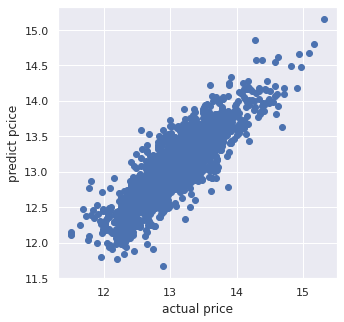

0.7747098203644156

In [33]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # 引入pyplot

lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練
sns.set(rc={'figure.figsize':(5,5)});
y_predict = lnregr.predict(x_valid) # valid的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
sns.set(rc={'figure.figsize':(10,10)})
plt.scatter(y_valid, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

lnregr.score(x_train, y_train) # 訓練模型的正確率

In [34]:
# 創建模型儲存目錄
model_dir = 'lab1-log/models/'
os.makedirs(model_dir)

In [35]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow import keras
# 建立一個Sequential型態的model
model = Sequential(name='model-1')
model.add(Dense(18, activation='relu', input_shape=(18,)))
model.add(Dense(9))
model.add(Dense(3, activation='softmax'))
model.add(Dense(1))
# 顯示網路模型架構
model.summary()
# 設定訓練使用的優化器、損失函數和指標函數
model.compile(tf.keras.optimizers.Adam(0.001),loss=keras.losses.MeanSquaredError(),metrics=[keras.metrics.MeanAbsoluteError()])

Model: "model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 3)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [36]:
# TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔
log_dir = os.path.join('lab1-log', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',
                                             monitor='val_mean_absolute_error',
                                             save_best_only=True,mode='min')

In [37]:
# 訓練網路模型
history = model.fit(x_train, y_train,  # 輸入訓練數據
               batch_size=8,  # 跟loss收斂還有訓練速度有關，
               epochs=100,  # 整個dataset訓練XX遍
               validation_data=(x_valid, y_valid),  # 驗證數據
               callbacks=[model_cbk, model_mckp]) 
# Tensorboard回調函數紀錄訓練過程，ModelCheckpoint回調函數儲存最好的模型

Epoch 1/100
1602/1602 [==============================] - 4s 2ms/step - loss: 114.6265 - mean_absolute_error: 10.6407 - val_loss: 82.0135 - val_mean_absolute_error: 9.0420
Epoch 2/100
1602/1602 [==============================] - 3s 2ms/step - loss: 59.6220 - mean_absolute_error: 7.6630 - val_loss: 40.2281 - val_mean_absolute_error: 6.3224
Epoch 3/100
1602/1602 [==============================] - 3s 2ms/step - loss: 26.6612 - mean_absolute_error: 5.0881 - val_loss: 15.4409 - val_mean_absolute_error: 3.8968
Epoch 4/100
1602/1602 [==============================] - 3s 2ms/step - loss: 8.7193 - mean_absolute_error: 2.8453 - val_loss: 3.7415 - val_mean_absolute_error: 1.8670
Epoch 5/100
1602/1602 [==============================] - 3s 2ms/step - loss: 1.6899 - mean_absolute_error: 1.1335 - val_loss: 0.5079 - val_mean_absolute_error: 0.5689
Epoch 6/100
1602/1602 [==============================] - 3s 2ms/step - loss: 0.3424 - mean_absolute_error: 0.4538 - val_loss: 0.2570 - val_mean_absolute_erro

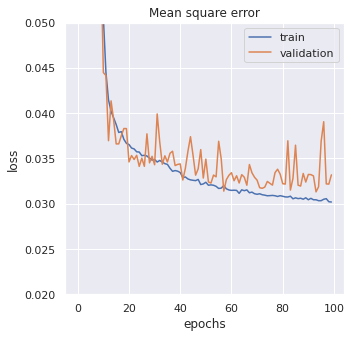

In [38]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0.02, 0.05)
plt.title('Mean square error')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

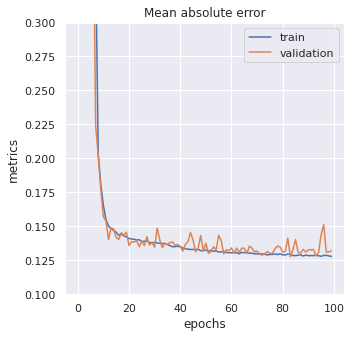

In [39]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.ylim(0.1, 0.3)
plt.title('Mean absolute error')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [43]:
test  = pd.read_csv(basepath + "test-v3.csv")
# 存下id
id = test['id'].values
# 取出垃圾
test = test.drop(['sale_month', 'sale_day', 'sale_yr', 'id'], axis = 1)
# 處理 data
var = 'sqft_lot15'
test[var] = test[var] - test[var].min()
test[var] = abs(test[var] - test[var].mean())
test[var] = np.log1p(test[var])
test[var] = abs(test[var] - test[var].max())
test[var] = np.log1p(test[var])
test[var] = abs(test[var] - test[var].max())
test[var] = np.log1p(test[var])
test[var] = abs(test[var] - test[var].max())
test[var] = np.expm1(test[var])
var = 'sqft_living15'
test[var] = np.log1p(test[var])
var = 'yr_built'
test[var] = test[var] - test[var].min()
test[var] = abs(test[var] - test[var].mean())
test[var] = np.log1p(test[var])
test[var] = abs(test[var] - test[var].max())
test[var] = np.log1p(test[var])
var = 'sqft_basement'
test[var] = np.power(test[var], 0.5)
test[var] = np.log1p(test[var])
var = 'sqft_above'
test[var] = np.log1p(test[var])
var = 'grade'
test[var] = np.log1p(test[var])
var = 'condition'
test[var] = np.log1p(test[var])
test[var] = np.log1p(test[var])
test[var] = np.log1p(test[var])
var = 'floors'
test[var] = np.log1p(test[var])
test[var] = np.log1p(test[var])
var = 'sqft_lot'
test[var] = np.log1p(test[var])
test[var] = np.log1p(test[var])
var = 'sqft_living'
test[var] = np.log1p(test[var])
var = 'bathrooms'
test[var] = np.log1p(test[var])
var = 'bedrooms'
test[var] = np.log1p(test[var])
var = 'long'
test[var] = (test[var] - test[var].min())/(test[var].max() - test[var].min())
test[var] = np.log1p(test[var])
test[var] = np.log1p(test[var])
# 標準化
mean = test.mean(axis=0) 
test -= mean
std = test.std(axis=0) 
test /= std

In [41]:
# 載入模型
model = keras.models.load_model('lab1-log/models/Best-model-1.h5')
# 預測測試數據
# test = test.values
# test = np.reshape(test, (test.shape[0], test.shape[1],1))

y_pred = model.predict(test)
# 將預測結果轉換回來(因為訓練時的訓練目標也有經過標準化)
y_predict =  np.expm1(y_pred)

In [42]:
id = list(id)

y_predict = np.array(y_predict).flatten()
y_predict = list(y_predict)

mem = {"id":  id, "price" : y_predict}
mem_df = pd.DataFrame(mem)
mem_df.head()
mem_df.to_csv("submission_RELU.csv", index=False)